#### Loading Data Set

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('data/dataset.csv').drop('Unnamed: 0', axis=1)

In [3]:
df = df.replace({'Gentle': 'Gentle-1', 'Moderate': 'Moderate-2', 'Tough': 'Tough-3','Diabolical': 'Diabolical-4'})

In [4]:
# check size
df.shape

(5029, 6)

In [5]:
df.head()

,Id,Sudoku,Solution,Level,People,Average-Time
0,0,8...74...1.........7.5.9.4....65.4..73.....296...,8591742361648325973725698412916574837354186296...,Diabolical-4,254,25
1,1,.5.....7.9......6...21.75.8.4..69.3...8...4......,8539461729175823644621375981458692376283754197...,Moderate-2,281,12
2,2,...45.2..3.........8....4..7...94.3.9..5.2.76....,6974532183248617955819274637186945329435128762...,Diabolical-4,265,22
3,3,9......31.3...8.....5.7.9..3...4...8.916..54.4...,9274568316341982758153729643527496187916835424...,Tough-3,279,19
4,4,9.......2784.1.5.....4.....2.53.1.7...7...8......,9615387427846125395234796182953814761479568236...,Moderate-2,301,14


In [23]:
len(df['Sudoku'][0])

81

In [20]:
## Check null values
df.isnull().sum()

Id              0
Sudoku          0
Solution        0
Level           0
People          0
Average-Time    0
dtype: int64

### Who many levels are there?

In [13]:
list(df['Level'].value_counts().index)

['Moderate-2', 'Diabolical-4', 'Tough-3', 'Gentle-1']

##### On the website they rank the levels in this way from the easiest to the most difficult:
##### 1. Gentle 
##### 2. Moderate 
##### 3. Tough 
##### 4. Diabolical


### QUESTION / HYPTHESIS /RESULTS

#### 1) Is the number of people who solve easy Sudoku greater than those who solve difficult?
#### Hypothesis: the total of players fro the level "Gentle" is bigger than the leven "Diabolical" 
#### Results:

In [24]:
gb1 = df.groupby('Level', as_index=False).agg({"People": "sum"}).sort_values(by='People', ascending=False)
total= gb1.People.sum()
gb1['%'] = gb1['People']/total
gb1.head()

,Level,People,%
2,Moderate-2,1699004,0.448928
0,Diabolical-4,955867,0.252569
1,Gentle-1,595112,0.157247
3,Tough-3,534597,0.141257


In [25]:
diabolical = gb1[gb1['Level']=='Diabolical-4'].values[0,1]
gentle = gb1[gb1['Level']=='Gentle-1'].values[0,1]


In [26]:
if gentle > diabolical:
    print('Hyphothesis is True')
else: 
    print('The hypothesis is False , more people plays diabolical than Gentle')

The hypothesis is False , more people plays diabolical than Gentle


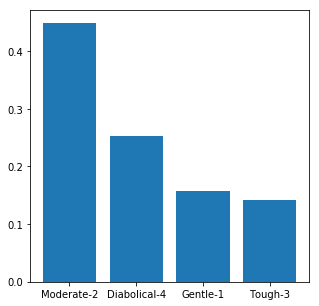

In [27]:
### Plot 
plt.figure(figsize=(5, 5))
plt.bar(gb1['Level'], gb1['%'])
plt.show();

#### 2) Does it take more time for people to solve the most difficult  ?
#### Hypothesis: The average time to solve Sudoku in a "Diabolical" level is bigger than "Thought" level
#### Results:

In [28]:
gb2 = df.groupby('Level', as_index=False).agg({"Average-Time": "mean"}).sort_values(by='Average-Time', ascending=False)
gb2.head()

,Level,Average-Time
0,Diabolical-4,31.026462
3,Tough-3,24.022253
2,Moderate-2,17.204082
1,Gentle-1,13.916435


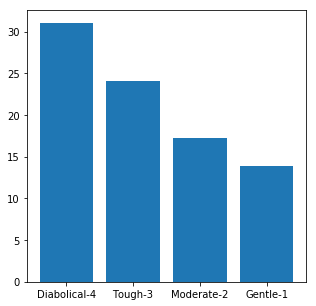

In [29]:
plt.figure(figsize=(5, 5))
plt.bar(gb2['Level'], gb2['Average-Time'])
plt.show();

#### 3) Is the difficulty of a level defined by the amound of numbers given in the initial Sudoku?
#### Hypothesis: Each Level has a range of numbers given in the initial Sudoku
#### Results:

In [56]:
df['number_given']= 0
for i in range(len(df)):
    df['number_given'][i] = sum(c.isdigit() for c in df['Sudoku'][i])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [32]:
sum(c.isdigit() for c in df['Sudoku'][0])

24

In [33]:
df['number_given'][0]

24

In [57]:
df.head()

,Id,Sudoku,Solution,Level,People,Average-Time,number_given
0,0,8...74...1.........7.5.9.4....65.4..73.....296...,8591742361648325973725698412916574837354186296...,Diabolical-4,254,25,24
1,1,.5.....7.9......6...21.75.8.4..69.3...8...4......,8539461729175823644621375981458692376283754197...,Moderate-2,281,12,28
2,2,...45.2..3.........8....4..7...94.3.9..5.2.76....,6974532183248617955819274637186945329435128762...,Diabolical-4,265,22,24
3,3,9......31.3...8.....5.7.9..3...4...8.916..54.4...,9274568316341982758153729643527496187916835424...,Tough-3,279,19,26
4,4,9.......2784.1.5.....4.....2.53.1.7...7...8......,9615387427846125395234796182953814761479568236...,Moderate-2,301,14,28


In [64]:
number_gentle = df['number_given'][df['Level']=='Gentle-1'].unique()
number_moderate = df['number_given'][df['Level']=='Moderate-2'].unique()
number_tough = df['number_given'][df['Level']=='Tough-3'].unique()
number_diabolical = df['number_given'][df['Level']=='Diabolical-4'].unique()

In [73]:
print('Gentle:',np.sort(number_gentle))
print('Moderate:',np.sort(number_moderate))
print('Tough: ',np.sort(number_tough))
print('Diabolical: ',np.sort(number_diabolical))

Gentle: [23 24 25 26 27 28 29]
Moderate: [22 23 24 25 26 27 28 29]
Tough:  [22 23 24 25 26 27 28 29]
Diabolical:  [21 22 23 24 25 26 27 28 29]


# PREDICT difficulty level base on the position of a number

In [ ]:
#Change dots "." by zeros 

In [77]:
df['new_Sudoku'] = df['Sudoku']

In [78]:
len(df['new_Sudoku'])

5029

In [79]:
def split(element): 
    return [char for char in element]

In [148]:
for i in range(len(df['new_Sudoku'])):

    df['new_Sudoku'][i] = [int(x.replace('.','0')) for x in df['new_Sudoku'][i]]


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [149]:
df.head()

,Id,Sudoku,Solution,Level,People,Average-Time,number_given,new_Sudoku
0,0,8...74...1.........7.5.9.4....65.4..73.....296...,8591742361648325973725698412916574837354186296...,Diabolical-4,254,25,24,"[8, 0, 0, 0, 7, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,1,.5.....7.9......6...21.75.8.4..69.3...8...4......,8539461729175823644621375981458692376283754197...,Moderate-2,281,12,28,"[0, 5, 0, 0, 0, 0, 0, 7, 0, 9, 0, 0, 0, 0, 0, ..."
2,2,...45.2..3.........8....4..7...94.3.9..5.2.76....,6974532183248617955819274637186945329435128762...,Diabolical-4,265,22,24,"[0, 0, 0, 4, 5, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, ..."
3,3,9......31.3...8.....5.7.9..3...4...8.916..54.4...,9274568316341982758153729643527496187916835424...,Tough-3,279,19,26,"[9, 0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 8, ..."
4,4,9.......2784.1.5.....4.....2.53.1.7...7...8......,9615387427846125395234796182953814761479568236...,Moderate-2,301,14,28,"[9, 0, 0, 0, 0, 0, 0, 0, 2, 7, 8, 4, 0, 1, 0, ..."


### PREDICT LEVEL

In [82]:
from sklearn.model_selection import train_test_split

In [150]:
y = df['Level']
x = df['new_Sudoku']

In [151]:
y = y.replace({'Gentle-1': '1', 'Moderate-2': '2', 'Tough-3': '3','Diabolical-4': '4'})


In [152]:
y.head()

0    4
1    2
2    4
3    3
4    2
Name: Level, dtype: object

In [153]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4023,), (4023,), (1006,), (1006,))

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=25,max_depth=10)

In [155]:
rf.fit(list(X_train),y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
y_pred =rf.predict(list(X_test))

In [157]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.3966202783300199

#### CNN

In [94]:
def transform_matrix(element):
  return np.reshape(element, (-1, 9))

In [164]:
X_train.shape

(4023,)

In [174]:
X_train_new = []

for i in X_train:
    X_train_new.append(np.array(transform_matrix(i).astype(np.float)))


In [175]:
len(X_train_new)

4023

In [176]:
X_train_new[0].shape


(9, 9)

In [110]:
# np.array(A).shape

(3, 4)

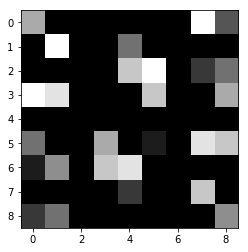

In [116]:
plt.gray()
plt.imshow(X_train_new[1])
plt.show()

In [117]:
y_train.shape

(4023,)

In [ ]:
X_train.shape,

In [100]:
# Create a model 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten


Using TensorFlow backend.


In [101]:
model = Sequential()
# Input => Hidden
model.add(Dense(9, input_dim=9, activation='relu'))
# Hiddens
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(3, activation='relu'))
# Output
model.add(Dense(1, activation='relu'))


model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(X_train.values,y_train.values, epochs=150)

ValueError: Error when checking input: expected dense_1_input to have shape (9,) but got array with shape (1,)